# Exploration of Random Walk from beginning to advance with simulated examples

- By Yuan Shi

In [1]:
###Import necessary packages for basic sampling and statistics purpose

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import time
import scipy as sc

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D


### Method 1: Simple Random Walk

An elementary example of a random walk is the random walk on the integer number line, which starts at 0 and at each step moves +1 or -1 with equal probability. Given the proceed direction is completely random.

In [2]:
### code our own simple random walk for simulation
def simple_random_walk(n):
    x, y = [0], [0]
    possible = [(1,0), (0,1), (-1,0), (0,-1)] 
    for i in range(n):
        dx, dy = possible[np.random.randint(0,4)]   #direction chosen at random
                                                    #achived by using numple random generator
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)
    return x, y

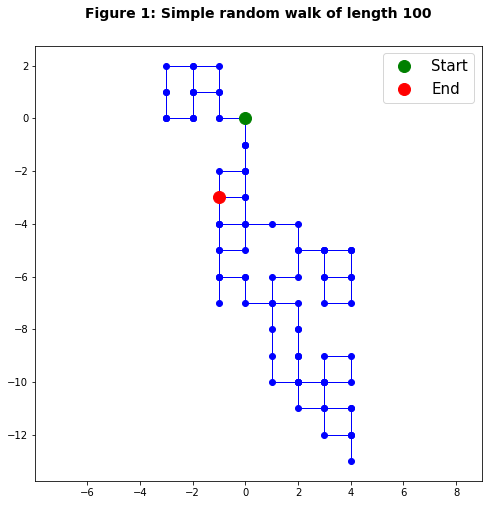

In [3]:
###Let's see an example of 100 walks
n=100
x, y = simple_random_walk(n)
plt.figure(figsize = (8, 8))
plt.plot(x, y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(x[-1], y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend(fontsize=15)
plt.title('Figure 1: Simple random walk of length ' + str(n), fontsize=14, fontweight='bold', y = 1.05)
plt.show()

### Method 2: Self-Avoid Walk

This time, the walk doesn't repeat a position visited before, this is a big difference compare to simple random walk

n (int): greatest length to consider

In [4]:
def self_avoid_walk(n):
    x, y = [0], [0]
    positions = set([(0,0)])  #record the path visited
    avoid = 0
    
    for i in range(n):
        possible = [(1,0), (0,1), (-1,0), (0,-1)]
        possible_feasible = []  #This stores the available directions 
        
        for dx, dy in possible:
            if (x[-1] + dx, y[-1] + dy) not in positions:  #checks if direction leads to a site not visited before
                possible_feasible.append((dx,dy))
                
        if possible_feasible:  #checks if there is a direction available
            dx, dy = possible_feasible[np.random.randint(0,len(possible_feasible))]  #choose a direction at random among available ones
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
        
        else: 
                        #When the walk is stuck 
            avoid = 1
            steps = i+1
            break  
                        #terminate the walk at this run because it hit itself, try another direction 
        steps = n+1
        
    return x, y, avoid, steps


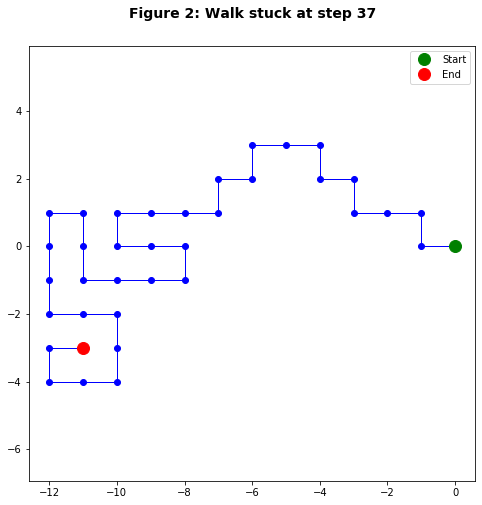

In [5]:
## Also, let's see an example of 100 walks
n=100
x, y, stuck, steps = self_avoid_walk(n)
plt.figure(figsize = (8, 8))
plt.plot(x, y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(x[-1], y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend()
if stuck:
    plt.title('Figure 2: Walk stuck at step ' + str(steps), fontsize=14, fontweight='bold', y = 1.05)
else:
    plt.title('Figure 2: SAW of length ' + str(n), fontsize=14, fontweight='bold', y = 1.05)
plt.show()

#### How many times it successfully move without getting stuck?

In [6]:
100 - 33

67

### method 3:  self-avoid walk simulation based on rejection sampling

The idea is to generate a lot of random walks, and evaluate if it is self-avoid walking, 

In [7]:
def is_self_avoid_walk(x, y, n):
    return n+1 == len(set(zip(x,y)))  


In [8]:
def rejection_sampling(n, samples):
    accept = 0
    for _ in range(samples):
        x, y = simple_random_walk(n) #generates a simple random walk
        if is_self_avoid_walk(x, y, n): #checks if it is a self-avoidling
            accept += 1
    return accept/samples

#### Let's evaluate the rejection sampling performance on accepteance rate

- n (int): greatest length to consider
- samples (int): number of simple walks to generate for each length

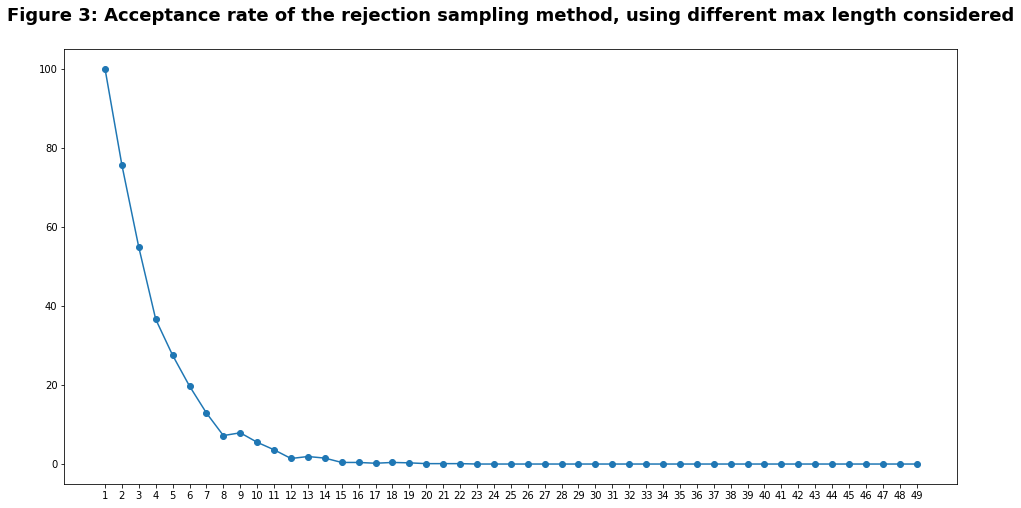

In [9]:
def plot_acceptance(n, samples):

    accept = []
    for i in range(1, n):
        accept.append(rejection_sampling(i, samples)*100)
    plt.figure(figsize = (16, 8))
    plt.plot(range(1, n), accept, 'o-')
    ax = plt.axes()
    ax.set_xticks(list(range(1,n)))
    plt.title('Figure 3: Acceptance rate of the rejection sampling method, using different max length considered', 
              fontsize=18, fontweight='bold', y = 1.05)
    plt.show()

plot_acceptance(50,1000)

### method 4: One-step-head self-avoid walk based on importance sampling

A big difference this method with naive method is, through this step: if (x[-1] + dx, y[-1] + dy) not in positions, the algorithm actually check if a neighbor is visited.

In [10]:
## A big difference this method with naive method is, through this step: 
##if not in positions, we actually check if a neighbor is visited
def one_step_ahead(n):
    x, y = [0], [0] 
    positions = set([(0,0)])
    weights = []
    stuck = 0
    for i in range(n):
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []
        for dx, dy in deltas:
            if (x[-1] + dx, y[-1] + dy) not in positions:
                deltas_feasible.append((dx,dy))
        if deltas_feasible:
            weights.append(len(deltas_feasible))  #add inverse probability to weights
            dx, dy = deltas_feasible[np.random.randint(0,len(deltas_feasible))]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
        else:
            stuck = 1
            break
    return x, y, stuck, weights

#### This is a plot of one of the sample to prove this is not a naive approach, it checks a step ahead

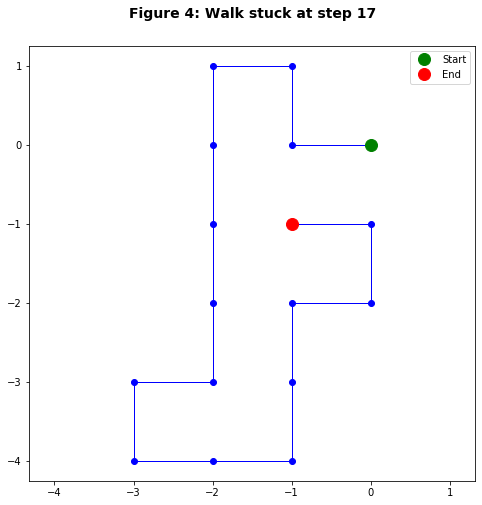

In [11]:
## Also, let's see an example of 100 walks, the difference is very clear
n=60
x, y, stuck, steps = one_step_ahead(n)
plt.figure(figsize = (8, 8))
plt.plot(x, y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(x[-1], y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend()
if stuck:
    plt.title('Figure 4: Walk stuck at step ' + str(len(x)), fontsize=14, fontweight='bold', y = 1.05)
else:
    plt.title('Figure 4: SAW of length ' + str(n), fontsize=14, fontweight='bold', y = 1.05)
plt.show()

#### Evaluation the performance of one-step-ahead saw

In [12]:
def my_evaluation(n, samples):

    fails = []
    lengths = []
    for i in range(samples):
        x, y, stuck, steps = one_step_ahead(n)
        fails.append(stuck)
        lengths.append(len(x)-1)
    return (fails, lengths)

Text(0.5, 1.05, 'Figure 5: Statistics for the one-step-head algorithm ')

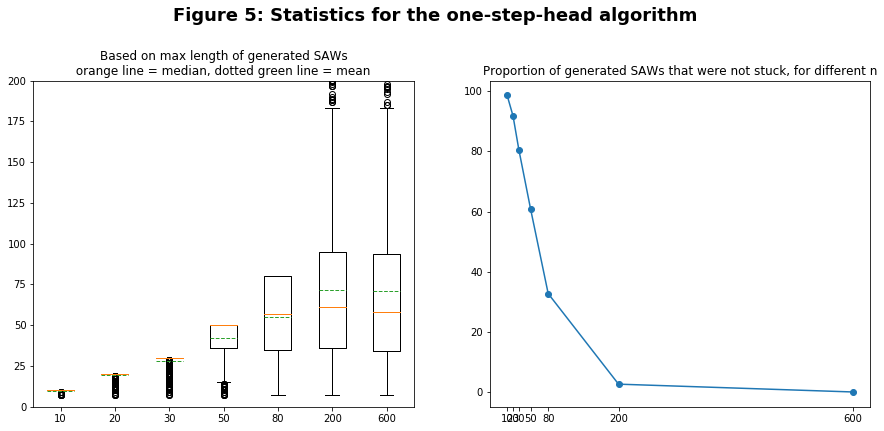

In [13]:
n_list = [10,20,30,50,80,200,600]
success, results_lengths = [], []
for n in n_list:
    fails, lengths = my_evaluation(n, 1000)
    success.append(100*(1-np.mean(fails)))
    results_lengths.append(lengths)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

bp = ax1.boxplot(results_lengths, meanline = True, showmeans = True)
ax1.set_xticklabels([str(n) for n in n_list])
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.set_ylim(0, 200)
ax1.set_title('Based on max length of generated SAWs' 
              + '\n orange line = median, dotted green line = mean ')

ax2.set_xticks(n_list)
graph = ax2.plot(n_list, success, 'o-')
ax2.set_title('Proportion of generated SAWs that were not stuck, for different n')

fig.suptitle('Figure 5: Statistics for the one-step-head algorithm ', fontsize=18, fontweight='bold', y = 1.05)

### method 5: the pivot algorithm using Markov chains 

The pivot algorithm is working very efficiently, and it has been extensively used in cases that we need extremaly large walks, such as walks of length larger than $10^7$. 



We decided to use a recursive method to generating SAWs that the idea is to generate a lot of small walks based on our 'self_avoid_walk' function (This is for n(max step walked) <3 ). For longer walks, we do a recursive call, We define dimer (n) as concat of $ dimer(floorn/2),dimer(n-floor(n/2)$. Again, please note that the concatenation of two SAWs does not necessary give a SAW. So, you will need to perform those recursive call many times until the result is a SAW. 

In [14]:
def dimer(n):

    if n <= 3:
        x, y, _, _ = self_avoid_walk(n) #base case uses the myopic algorithm
        return x, y
    else:
        not_saw = 1
        while not_saw:
            (x_1, y_1) = dimer(n//2)  #recursive
            (x_2, y_2) = dimer(n-n//2)  #recursive
            x_2 = [x + x_1[-1] for x in x_2]  #translates the second walk to the end of the first one
            y_2 = [y + y_1[-1] for y in y_2]
            x_concat, y_concat = x_1 + x_2[1:], y_1 + y_2[1:]  #concatenation two SAW
            if is_self_avoid_walk(x_concat, y_concat, n):   #if walk obtained is SAW, stop
                not_saw = 0
        return x_concat, y_concat

In [15]:
##initialization

pos1, pos2, pos3, pos4 = np.array([[1,0],[0,1]]), np.array([[0,-1],[1,0]]), np.array([[-1,0],[0,-1]]), np.array([[0,1],[-1,0]])
pos5, pos6, pos7, pos8 = np.array([[1,0],[0,-1]]), np.array([[0,1],[1,0]]), np.array([[-1,0],[0,1]]), np.array([[0,-1],[-1,0]])
position_list = [pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8]

When we are generating SAWs of length n using the pivot algorithm, SAWs are represented by a 2*(n+1) matrix, which makes it very simple to pivot walks - which is done with matrix multiplication.

In [16]:
"""
input parameters:
    n (int): length of the SAWs
    samples (int): length of the Markov chain that we created 
"""

def pivot_algorithm(n, samples, option):

    results = []
    
    if option == 'dimer':
        x, y = dimer(n)
    else:
        x, y = range(0,n+1), [0 for _ in range(n+1)]
    walk = np.c_[x,y].T
    results.append(walk)
    
    #for each MC
    for i in range(samples):
        i = np.random.randint(0,n) ### randomly choos the start point
        
        pos = position_list[np.random.randint(0,8)]  ## choose the rotation at random
        walk_1, walk_2 = walk[:, 0:i+1], walk[:, i+1:]  
        pivot = np.vstack(walk[:, i])  ##define our povot to walk on
        walk_2 = np.dot(pos, (walk_2 - pivot)) + pivot   ### test direction 
        walk_path = np.c_[walk_1,walk_2]  
        
        if np.unique(walk_path, axis=1).shape[1] == (n+1):   #check if resulting path is SAW
            results.append(walk_path)  
            walk = walk_path
        else:
            results.append(walk)
    return results

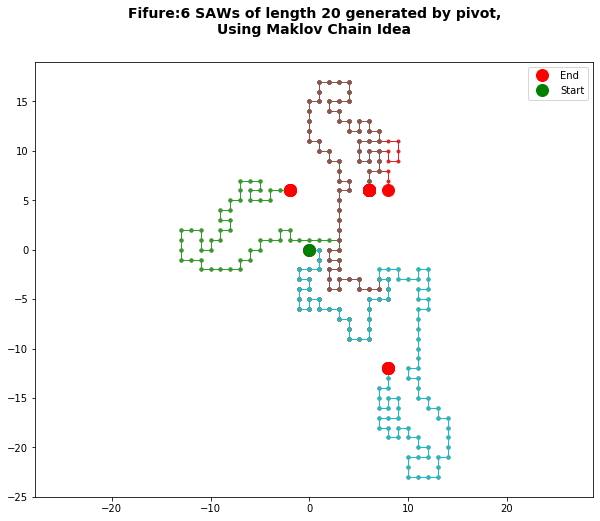

In [17]:
plt.figure(figsize = (10, 8))
results = pivot_algorithm(100, 80, 'dimer')

for k in range(0,20):
    walk = results[k]
    x, y = walk[0], walk[1] 
    plt.plot(x, y, '.-', linewidth = 1)
    plt.plot(x[-1], y[-1], 'ro', ms = 12)
plt.plot(0, 0, 'ro', ms = 12, label = 'End')
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.axis('equal')
plt.legend()
plt.title( 'Fifure:6 SAWs of length ' + str(20) + ' generated by pivot,\n'+
                  'Using Maklov Chain Idea', 
            fontsize=14, fontweight='bold', y = 1.05)
plt.show()

### method 6: The random Walk in 3D environment

The key remains the same for the random walk in 2D, here, we are implementing an approach that random walk also works in 3D enviroment wish shown visualization. This is not a new method, but is a new type of approach of visualizing Random Walk.

Text(0.5, 0.92, 'Figure7: 3D Random Walk, "red - start", "Black - end"')

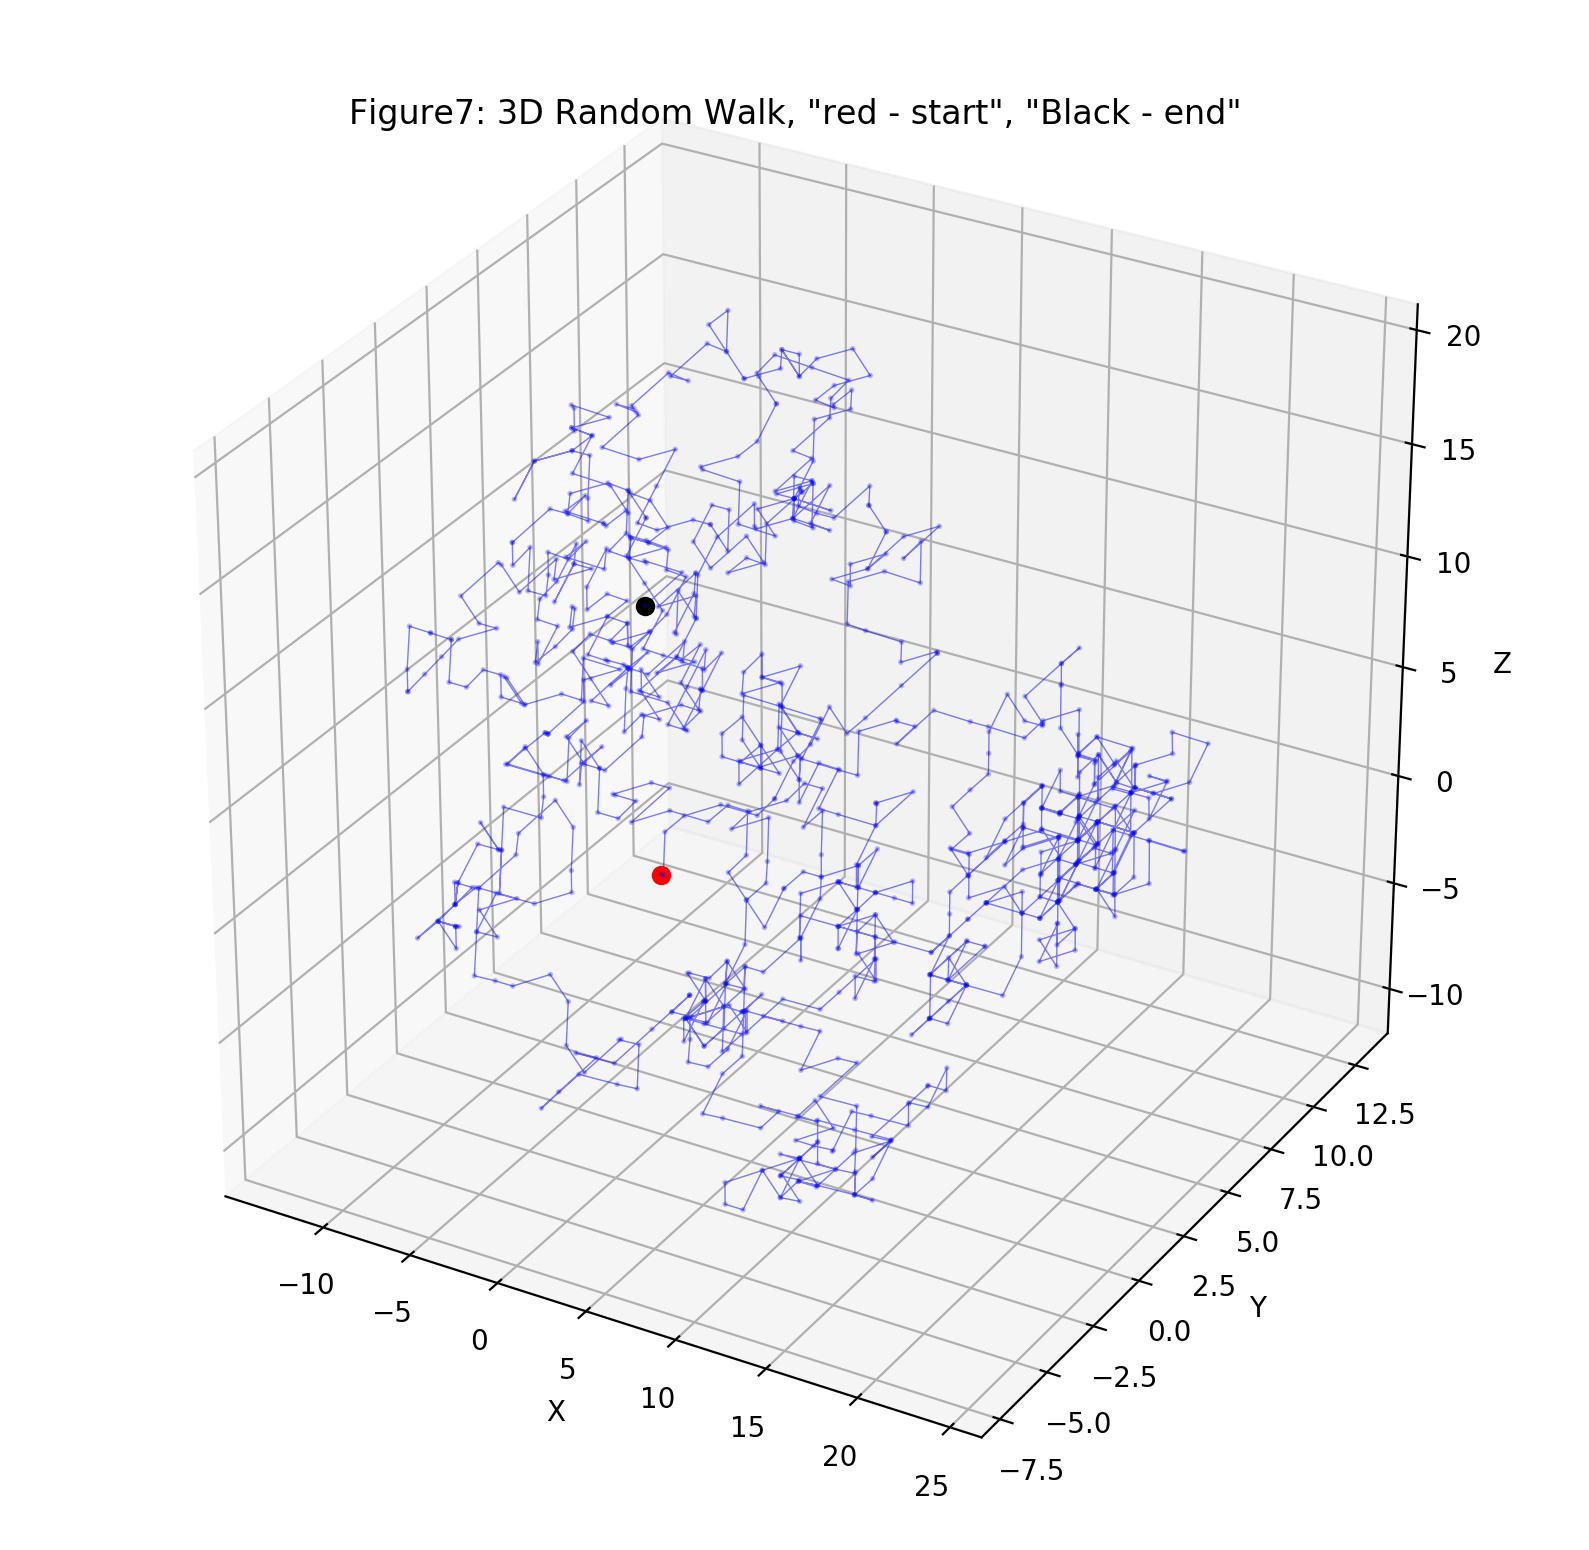

In [18]:
# First: Define parameters for the walk
dims = 3
length = 1000
direction = [-1, 0, 1]

origin = np.zeros((1,dims)) ## start point


# Simulate steps in 3D
init = (length,dims)

steps = np.random.choice(a=direction, size=init)

path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(10,10),dpi=200)

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter3D(path[:,0], path[:,1], path[:,2], 
             c='blue', alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], 
          c='blue', alpha=0.5, lw=0.5)
ax.plot3D(start[:,0], start[:,1], start[:,2], 
          c='red', marker='o')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
          c='black', marker='o')

plt.title('Figure7: 3D Random Walk, "red - start", "Black - end"')

